## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how = 'outer')


# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#trying to combine the data using different command
combined_data1_df = pd.merge(mouse_metadata_df, study_results_df, how = 'outer', on='Mouse ID')
combined_data1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].nunique()
number_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.shape[0]
duplicate_mice

1893

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df.drop_duplicates(subset="Mouse ID", keep="last")
clean_combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice_number = clean_combined_data_df.shape[0]
clean_data_mice_number

249

In [9]:
clean_data_mice_number_unique = clean_combined_data_df.nunique()
clean_data_mice_number_unique

Mouse ID              249
Drug Regimen           10
Sex                     2
Age_months             24
Weight (g)             16
Timepoint              10
Tumor Volume (mm3)    238
Metastatic Sites        5
dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_combined_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_combined_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = clean_combined_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_combined_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_combined_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
tumor_stats_results = pd.DataFrame({
    "Mean Tumor Volume":tumor_mean,
    "Median Tumor Volume":tumor_median,
    "Variance Tumor Volume":tumor_variance,
    "Standard Deviation Tumor Volume":tumor_std,
    "SEM Tumor Volume":tumor_sem, #SEM is the standard error of the mean
})



In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats_results
                              

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [30]:
regimen_total = clean_combined_data_df["Drug Regimen"].value_counts()
regimen_total_df = pd.DataFrame(regimen_total)
#regimen_total = pd.DataFrame(pd.value_counts(clean_combined_data_df["Drug Regimen"]))
regimen_total_df

,Drug Regimen
Ramicane,25
Capomulin,25
Infubinol,25
Placebo,25
Ceftamin,25
Zoniferol,25
Ketapril,25
Propriva,25
Naftisol,25
Stelasyn,24


In [25]:
# Using the aggregation method, produce the same summary statistics in a single line

regimen_total_df = clean_combined_data_df.agg(['sum', 'median', 'var','std', 'sem'])
regimen_total_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
sum,k403s185x401m601g791s508f966m546z578j913u364n3...,RamicaneCapomulinCapomulinCapomulinRamicaneRam...,MaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemale...,3170.000000,6503.000000,8195.000000,13694.785082,419.000000
median,NaN,NaN,NaN,13.000000,27.000000,45.000000,55.841410,1.000000
var,NaN,NaN,NaN,52.253919,13.667833,239.169582,160.151054,1.757805
std,NaN,NaN,NaN,7.228687,3.697003,15.465109,12.655080,1.325823
sem,NaN,NaN,NaN,0.458099,0.234288,0.980061,0.801983,0.084021


## Bar and Pie Charts

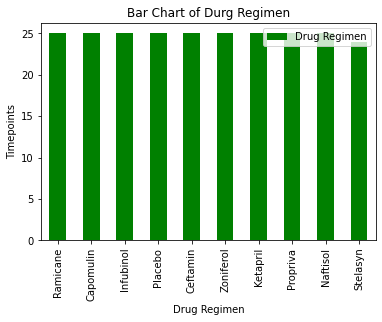

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_total_df.plot(kind="bar", color="g")
plt.title("Bar Chart of Durg Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


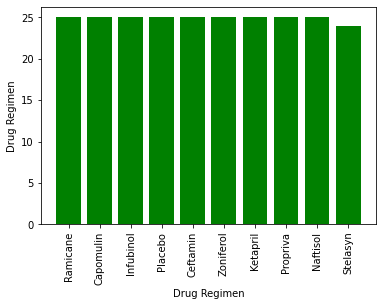

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_combined_data_df["Drug Regimen"].value_counts().index
y_axis = clean_combined_data_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color='g' )
plt.xticks(rotation=90)
plt.ylabel("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.show()


In [34]:
# getting the stats on gender
gender = pd.value_counts(clean_combined_data_df['Sex'])
gender

Male      125
Female    124
Name: Sex, dtype: int64

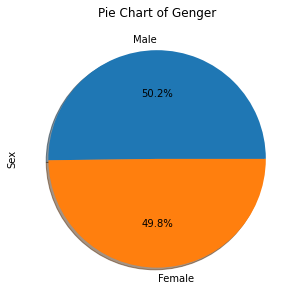

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = gender.plot.pie(y='Sex', title = "Pie Chart of Genger", autopct='%1.1f%%', shadow = True,figsize=(5,5))


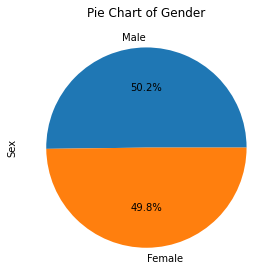

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart = gender.plot(kind="pie", title= "Pie Chart of Gender", autopct='%1.1f%%')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
